In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
from sklearn import preprocessing
import seaborn as sns

In [22]:
hr = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/python/HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
def statistic_value (name):
    print(statistics.median(hr.Work_accident)) # Медиана
    print(hr.Work_accident.isnull().sum()) # Количество выбросов
    print(statistics.pvariance(hr.Work_accident)) # Дисперсия
    print(statistics.pstdev(hr.Work_accident)) # Стандартное отклонение
    print(statistics.mean(hr.Work_accident)) # Среднее \ математическое ожидание
    print(max(hr.Work_accident))
    print(min(hr.Work_accident))
    print(max(hr.Work_accident)-min(hr.Work_accident)) # Размах
    print(statistics.mode(hr.Work_accident))

In [24]:
'''\
Задание 2\
'''
print(statistic_value(hr.Work_accident), 'Work_accident')
print(statistic_value(hr.satisfaction_level), 'satisfaction_level')
print(statistic_value(hr.last_evaluation), 'last_evaluation')
print(statistic_value(hr.number_project), 'number_project')
print(statistic_value(hr.average_montly_hours), 'average_montle_hours')
print(statistic_value(hr.time_spend_company), 'time_spend_company')
print(statistic_value(hr.left), 'left')
print(statistic_value(hr.promotion_last_5years), 'promotion_last_5years')
print(statistic_value(hr.sales), 'sales')
print(statistic_value(hr.salary),'salary')

0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None Work_accident
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None satisfaction_level
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None last_evaluation
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None number_project
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None average_montle_hours
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None time_spend_company
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None left
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None promotion_last_5years
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None sales
0
0
0.12369769247589593
0.3517068274513532
0.1446096406427095
1
0
1
0
None salary


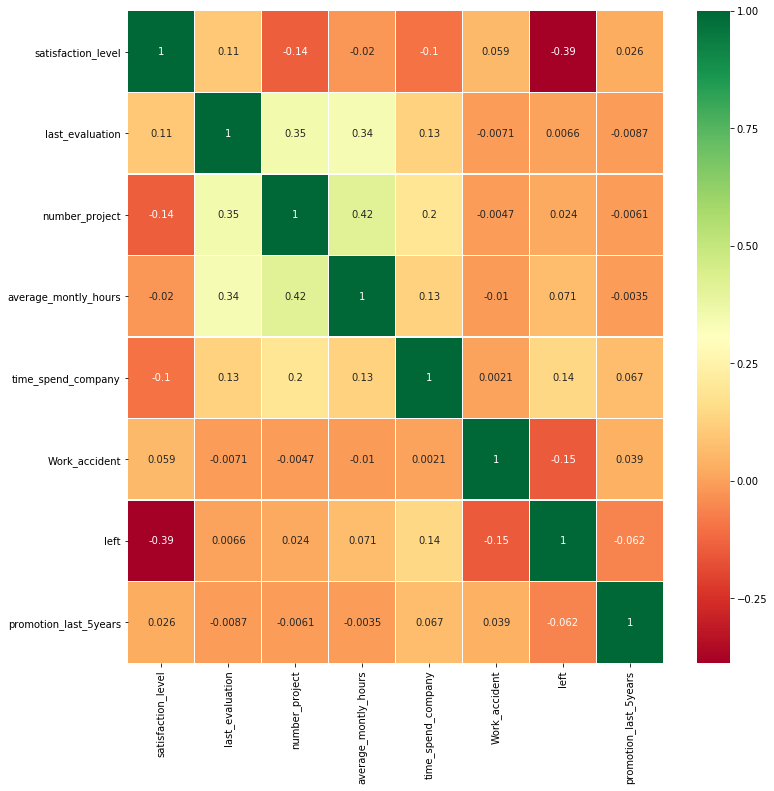

'Задание 3'

In [25]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12) # Матрица корреляции
plt.show()

'''\
Задание 3\
'''

'Задание 4.Данные никак не связаны между собой'

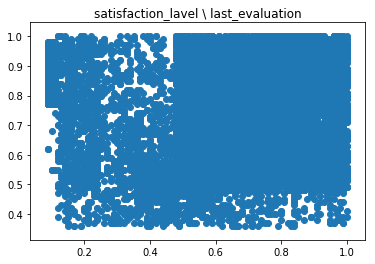

In [26]:
plt.scatter(hr['satisfaction_level'], hr['last_evaluation'])
plt.title('satisfaction_lavel \ last_evaluation')

'''\
Задание 4.\
Данные никак не связаны между собой\
'''

'Задание 4.Данные никак не связаны между собой'

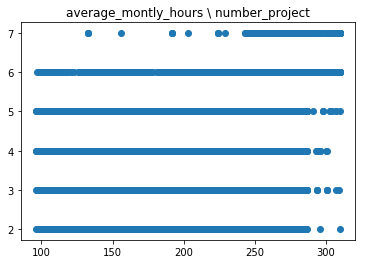

In [27]:
plt.scatter(hr['average_montly_hours'], hr['number_project'])
plt.title('average_montly_hours \ number_project')

'''\
Задание 4.\
Данные никак не связаны между собой\
'''

In [28]:
print(sts.ttest_ind(hr.satisfaction_level, hr.last_evaluation))

'''\
Задание 5.\
t-test показывает, что данные hr.satisfaction_lavel и hr.last_evaluation никак не связаны между собой.\
Как и в предыдущем задании.\
'''

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)


'Задание 5.t-test показывает, что данные hr.satisfaction_lavel и hr.last_evaluation никак не связаны между собой.Как и в предыдущем задании.'

In [29]:
print(sts.ttest_ind(hr.average_montly_hours, hr.number_project))

'''\
Задание 5.\
t-test показывает, что данные hr.average_montly_hours и hr.number_project никак не связаны между собой.\
Как и в предыдущем задании.\
'''

Ttest_indResult(statistic=483.54229603425085, pvalue=0.0)


'Задание 5.t-test показывает, что данные hr.average_montly_hours и hr.number_project никак не связаны между собой.Как и в предыдущем задании.'

In [30]:
hr_without_left = hr[hr['left'] == 0] # вычесть из списка сотрудников уволившихся
hr_only_left = hr[hr['left'] == 1]
sales_w_l = hr_without_left.groupby('sales').count()
print(sales_w_l.salary) # работники компании по отделам 

'''\
Задание 6\
'''

sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: salary, dtype: int64


'Задание 6'

'Задание 7.на графике видно, что сотрудников с средней з\\п и с низкооплачиваемой приблезительно равное количество.'

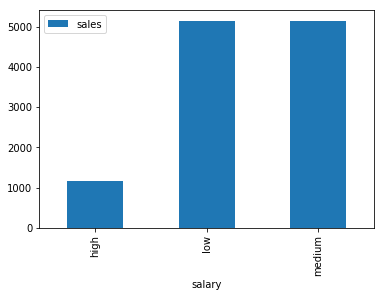

In [31]:
filter_hr = hr_without_left.filter(items = ['sales', 'salary']) # взять из файла два столбца
hr_salary = filter_hr.groupby('salary').count()
hr_salary.plot(kind = 'bar') # сколько сотрудников получают з\п разного уровня

'''\
Задание 7.\
на графике видно, что сотрудников с средней з\п и с низкооплачиваемой приблезительно равное количество.\
'''

        sales
salary       
high        1
low        22
medium     27


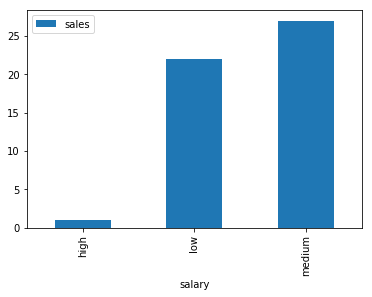

In [32]:
dep_filter = filter_hr.groupby('sales').head() # сортировка по департаментам
department_salary = dep_filter.groupby('salary').count() # сортировка по зарплате
department_salary.plot(kind = 'bar')

'''\
Задание 8.\
В отделах наибольший тип зарплат - средний. Высокую зарплату получают только в одном отделе.\
Низкооплачиваемая работа есть не во всех отделах.\
'''
print(department_salary)

In [33]:
'''\
Задание 9.\
 Из компании уволилось 3571 сотрудник\
'''
hr.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


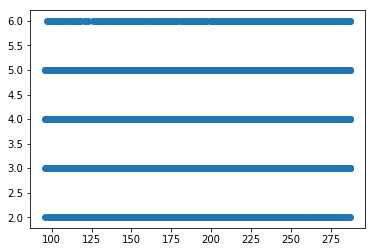

In [34]:
left_ = hr_without_left.filter(items = ['average_montly_hours', 'number_project']) # Сотрудники, работающие на данный момент в компании
left_.sort_values('number_project') # Сортировка 
plt.scatter(left_['average_montly_hours'], left_['number_project']) # Соотношение количства проектов и количество часов работы за месяц

'Задание 10.На данных двух графиках мы сравнивали соотношение среднее количество рабочих часов в месяц/количество проектов.На первом графике показано соотношение сотрудников, работающих на данный момент в компании.Здесь видно, что нет явной корреляции.На втором графике мы сравнивали аналогичные данные для уволившихся сотрудников.Здесь можно увидеть корреляцию данных - чем больше сотрудники работаю, чем больше проектов они выполнили.Можно сделать вывод, что в компании остались работать сотрудники, которые могут работать продуктивнее.\n'

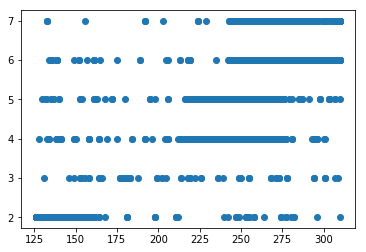

In [35]:
right_ = hr_only_left.filter(items = ['average_montly_hours', 'number_project']) # Только уволившиеся сотрудники
plt.scatter(right_['average_montly_hours'], right_['number_project']) # Соотношение количества проектов и часов работы
right_.sort_values('number_project') # Сортировка

'''\
Задание 10.\
На данных двух графиках мы сравнивали соотношение среднее количество рабочих часов в месяц/количество проектов.\
На первом графике показано соотношение сотрудников, работающих на данный момент в компании.\
Здесь видно, что нет явной корреляции.\
На втором графике мы сравнивали аналогичные данные для уволившихся сотрудников.\
Здесь можно увидеть корреляцию данных - чем больше сотрудники работаю, чем больше проектов они выполнили.\
Можно сделать вывод, что в компании остались работать сотрудники, которые могут работать продуктивнее.\

'''

'right - работники, покинувшие компанию.left - работники, оставшиеся в компании.\nНа данном графике изображено количество инцидентов на роботе по уволенным/оставшимся сотрудникам.Зеленый столбец показывает сколько в компании осталось работать сотрудников без инцидентов.Красный стобцец - сколько работает сотрудников с инцидентами.Желтый стобец показывает количество уволившихся сотрудников с инцидентами.Синий - уволившихся сотрудников без инцидентов.\nНа графике видно, что абсолютное большинство сотрудников, оставшихся в компании, работает без инцидентов.По данному графику можно сделать вывод, что сотрудники покидают компанию в связи с тем, что не справляются с работой.\n'

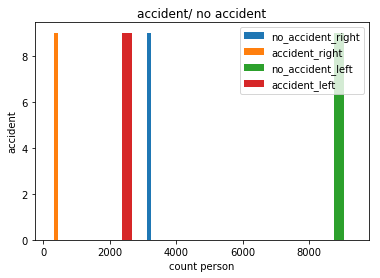

In [36]:
work_accident_left = hr_without_left.groupby('Work_accident').count()
work_accident_right = hr_only_left.groupby('Work_accident').count()
ark = ['no_accident_right','accident_right']
ark2 = ['no_accident_left', 'accident_left']
plt.hist(work_accident_right, label = ark)
plt.hist(work_accident_left, label = ark2)
plt.legend(loc = 'best')
plt.xlabel('count person')
plt.ylabel('accident')
plt.title('accident/ no accident')

'''\
right - работники, покинувшие компанию.\
left - работники, оставшиеся в компании.\

На данном графике изображено количество инцидентов на роботе по уволенным/оставшимся сотрудникам.\
Зеленый столбец показывает сколько в компании осталось работать сотрудников без инцидентов.\
Красный стобцец - сколько работает сотрудников с инцидентами.\
Желтый стобец показывает количество уволившихся сотрудников с инцидентами.\
Синий - уволившихся сотрудников без инцидентов.\

На графике видно, что абсолютное большинство сотрудников, оставшихся в компании, работает без инцидентов.\
По данному графику можно сделать вывод, что сотрудники покидают компанию в связи с тем, что не справляются с работой.\

'''